# Clustering and Dimensionality Reduction

## 1. Clustering

### 1.1 K-Means Clustering

**Explanation:**
K-Means is a type of unsupervised learning algorithm used for clustering. It partitions the data into K distinct clusters based on the distance to the centroid of a cluster.
- **Step 1:** Initialize K centroids randomly.
- **Step 2:** Assign each data point to the nearest centroid.
- **Step 3:** Recalculate the centroids as the mean of all data points assigned to each centroid.
- **Step 4:** Repeat Steps 2 and 3 until the centroids do not change significantly.

**Simple Dataset:**

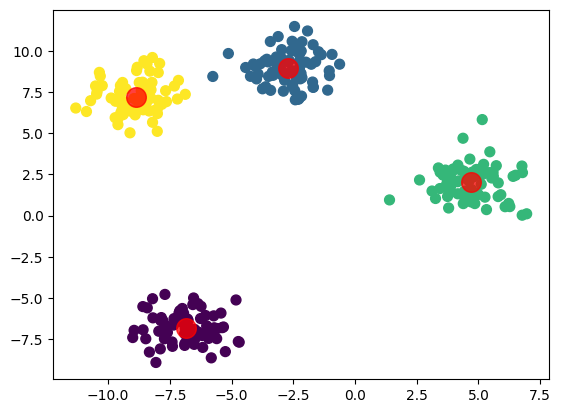

In [28]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Create a synthetic dataset
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75);
plt.show()

Now we utilize the elbow method to visualize the intertia for different values of K:

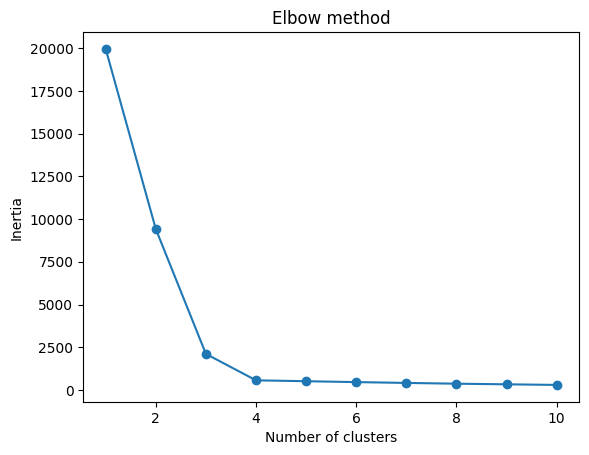

In [32]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Time Series Dataset:**
To work with time series data similar to IMU data, we need to preprocess and window the data. We'll simulate a dataset with three activities: walking, running, and standing.

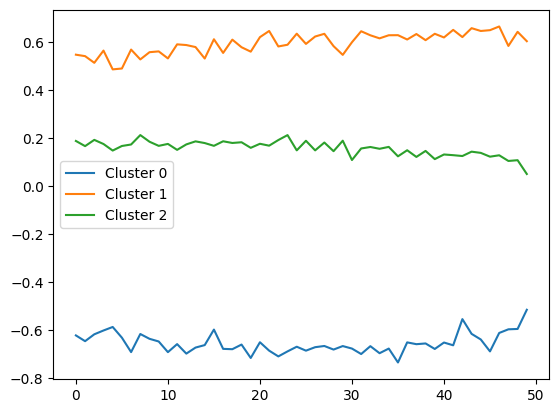

In [49]:
# Simulate IMU data
np.random.seed(42)

# Parameters
n_samples = 1000
n_features = 6  # 3 accelerometer + 3 gyroscope
n_activities = 3  # walking, running, standing

# Generate synthetic IMU data
imu_data = np.zeros((n_samples, n_features))

# Walking: low-frequency sinusoidal data
imu_data[:333, :3] = np.sin(np.linspace(0, 10, 333)).reshape(-1, 1) * np.random.normal(1, 0.1, (333, 3))
imu_data[:333, 3:] = np.sin(np.linspace(0, 10, 333)).reshape(-1, 1) * np.random.normal(1, 0.1, (333, 3))

# Running: high-frequency sinusoidal data
imu_data[333:666, :3] = np.sin(np.linspace(0, 50, 333)).reshape(-1, 1) * np.random.normal(1, 0.1, (333, 3))
imu_data[333:666, 3:] = np.sin(np.linspace(0, 50, 333)).reshape(-1, 1) * np.random.normal(1, 0.1, (333, 3))

# Standing: low variance noise
imu_data[666:, :3] = np.random.normal(0, 0.1, (334, 3))
imu_data[666:, 3:] = np.random.normal(0, 0.1, (334, 3))

# Apply K-Means on windowed IMU data
# Define window size and step size
window_size = 50
step_size = 25

# Create windows
windows = []
for start in range(0, n_samples - window_size + 1, step_size):
    window = imu_data[start:start + window_size].flatten()
    windows.append(window)
windows = np.array(windows)

# Apply K-Means on the windowed data
kmeans_imu = KMeans(n_clusters=n_activities)
kmeans_imu.fit(windows)
y_kmeans_imu = kmeans_imu.predict(windows)

# Plot the cluster centers
for i in range(n_activities):
    plt.plot(kmeans_imu.cluster_centers_[i][:50], label=f'Cluster {i}')
plt.legend()
plt.show()

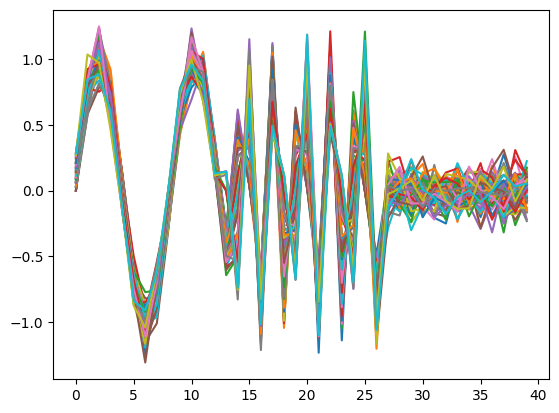

In [46]:
plt.plot(windows)

### 1.2 Agglomerative Hierarchical Clustering

**Explanation:**
Agglomerative Hierarchical Clustering is a type of clustering algorithm that builds a hierarchy from the bottom up. It starts with each data point as its own cluster and merges the closest pairs of clusters until only one cluster remains.

Linkage criteria:
- **Single linkage:** minimum distance between clusters
- **Complete linkage:** maximum distance between clusters
- **Average linkage:** average distance between clusters

**Simple Dataset:**

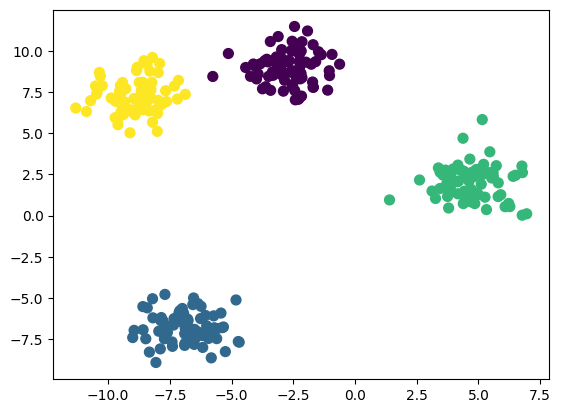

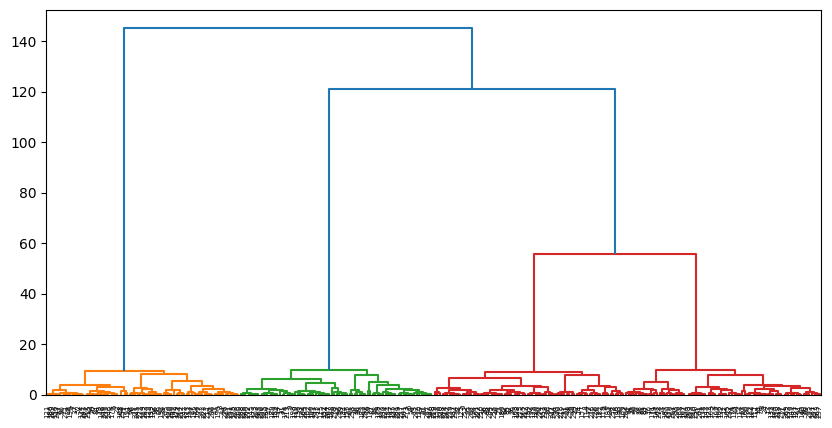

In [50]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
y_agglo = agglo.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_agglo, s=50, cmap='viridis')
plt.show()

# Plot the dendrogram
Z = linkage(X, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

**Time Series Dataset:**
Now let's apply Agglomerative Clustering to the windowed IMU data.

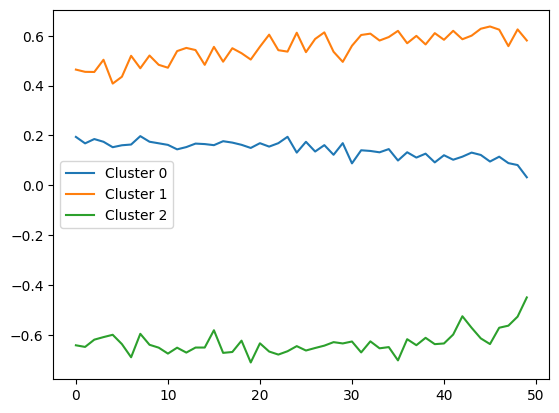

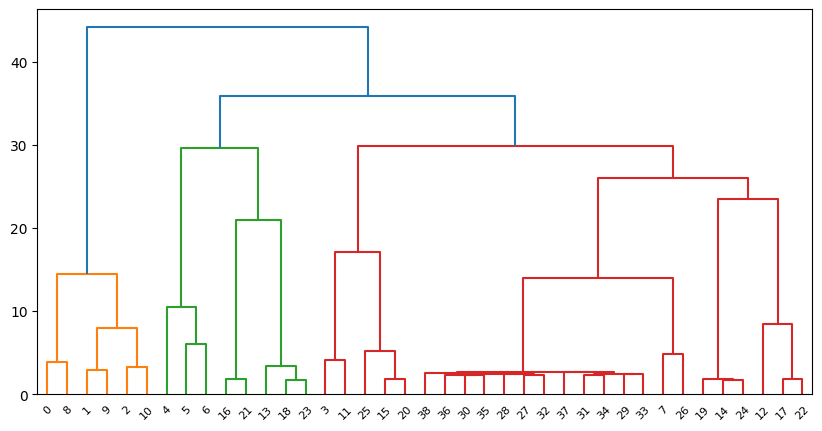

In [ ]:
# Apply Agglomerative Clustering on the windowed IMU data
agglo_imu = AgglomerativeClustering(n_clusters=n_activities)
y_agglo_imu = agglo_imu.fit_predict(windows)

# Plot the clusters
for i in range(n_activities):
    plt.plot(np.mean(windows[y_agglo_imu == i], axis=0)[:50], label=f'Cluster {i}')
plt.legend()
plt.show()

# Plot the dendrogram
Z_imu = linkage(windows, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(Z_imu)
plt.show()

### 1.3 DBSCAN

**Explanation:**
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed together, marking as outliers the points that lie alone in low-density regions.
- **Core points:** Points that have at least a minimum number of other points within a given radius.
- **Border points:** Points that have fewer than the minimum number of points within the radius but are in the neighborhood of a core point.
- **Noise points:** Points that are neither core points nor border points.

**Simple Dataset:**

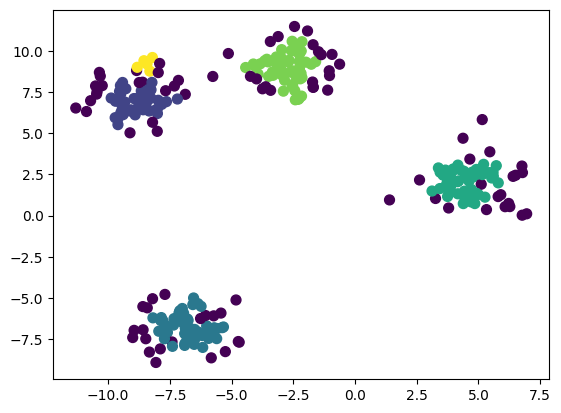

In [ ]:
# Import necessary library
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.show()

**Time Series Dataset:**
Now let's apply DBSCAN to the windowed IMU data.

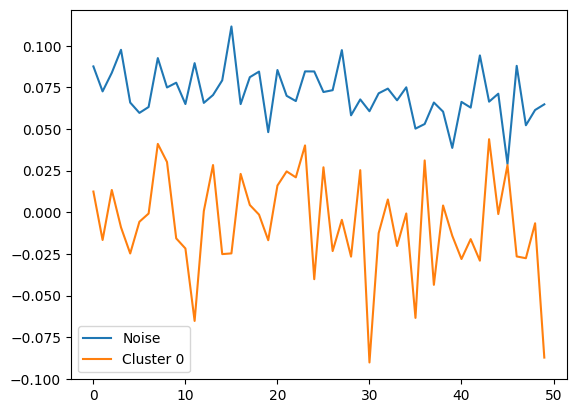

In [ ]:
# Apply DBSCAN on the windowed IMU data
dbscan_imu = DBSCAN(eps=3, min_samples=5)
y_dbscan_imu = dbscan_imu.fit_predict(windows)

# Plot the clusters
for i in np.unique(y_dbscan_imu):
    if i == -1:
        label = 'Noise'
    else:
        label = f'Cluster {i}'
    plt.plot(np.mean(windows[y_dbscan_imu == i], axis=0)[:50], label=label)
plt.legend()
plt.show()

## 2. Dimensionality Reduction

### 2.1 PCA (Principal Component Analysis)

**Explanation:**
PCA is a technique used to emphasize variation and bring out strong patterns in a dataset. It does this by transforming the data into a set of orthogonal (uncorrelated) variables called principal components.
- **Step 1:** Standardize the data.
- **Step 2:** Compute the covariance matrix.
- **Step 3:** Calculate the eigenvalues and eigenvectors of the covariance matrix.
- **Step 4:** Sort the eigenvalues and select the top k eigenvectors.
- **Step 5:** Transform the original data to the new k-dimensional space.

**Simple Dataset:**

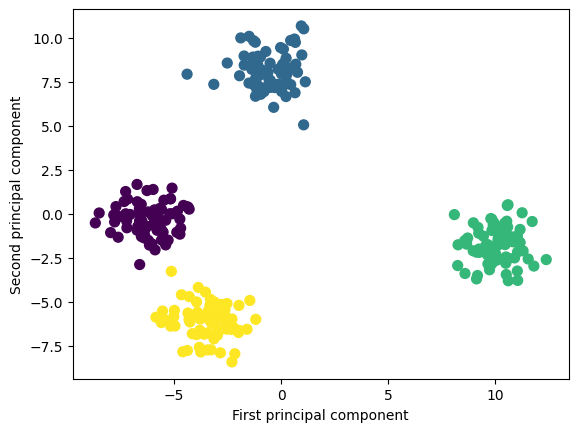

In [54]:
# Import necessary library
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA result
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

**Time Series Dataset:**
Now let's apply PCA to the windowed IMU data.

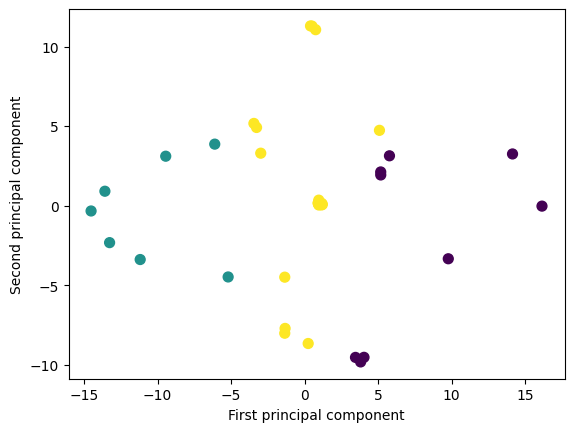

In [ ]:
# Apply PCA on the windowed IMU data
pca_imu = PCA(n_components=2)
windows_pca = pca_imu.fit_transform(windows)

# Plot the PCA result
plt.scatter(windows_pca[:, 0], windows_pca[:, 1], c=y_kmeans_imu, s=50, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

### 2.2 t-SNE (t-Distributed Stochastic Neighbor Embedding)

**Explanation:**
t-SNE is a technique for dimensionality reduction that is particularly well-suited for the visualization of high-dimensional datasets. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.
- **Step 1:** Compute pairwise similarity in the high-dimensional space.
- **Step 2:** Compute pairwise similarity in the low-dimensional space.
- **Step 3:** Optimize the low-dimensional points to minimize the divergence between the two sets of pairwise similarities.

**Simple Dataset:**

/Users/konak/opt/anaconda3/envs/note/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/konak/opt/anaconda3/envs/note/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


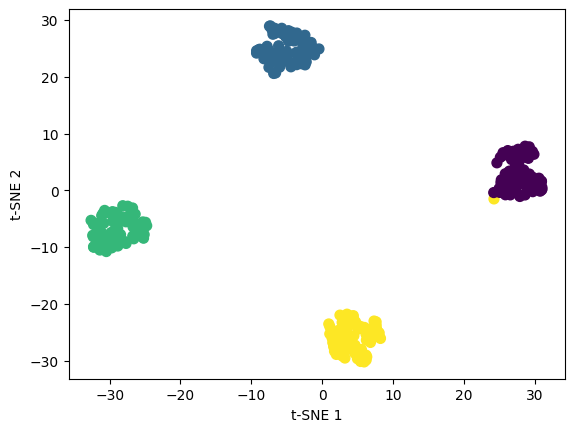

In [57]:
# Import necessary library
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE result
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, s=50, cmap='viridis')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

**Time Series Dataset:**
Now let's apply t-SNE to the windowed IMU data.

/Users/konak/opt/anaconda3/envs/note/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/konak/opt/anaconda3/envs/note/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


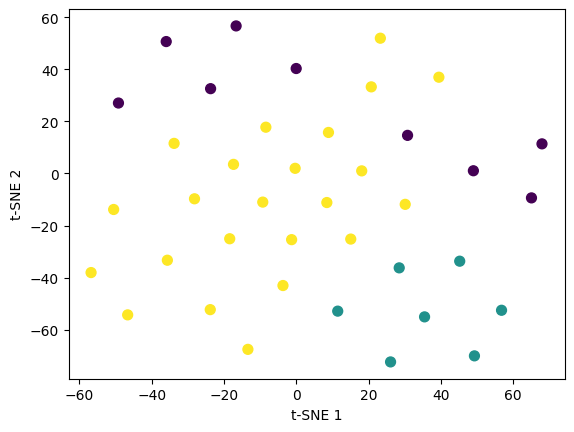

In [ ]:
# Apply t-SNE on the windowed IMU data
tsne_imu = TSNE(n_components=2)
windows_tsne = tsne_imu.fit_transform(windows)

# Plot the t-SNE result
plt.scatter(windows_tsne[:, 0], windows_tsne[:, 1], c=y_kmeans_imu, s=50, cmap='viridis')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

## 3 Example: Anomaly Detection through Clustering

### Introduction

*Unsupervised learning* refers to machine learning techniques where we do not give the learning algorithm a target output (e.g. a set of expected classifications of the data). Instead, the algorithm must interpret the data entirely on its own, without any supervision from the user. Unsupervised learning is useful when we don't have access to pre-labelled data (e.g. this set of measurements corresponds to a faulty unit, and this other set of measurements corresponds to a funcitoning unit), or when we're more interested in exploring what trends exist in data (including those we may not even know about). However, the distinctions drawn in unsupervised learning tend to be less clear-cut than in supervised learning, and often involve more subjectivity in choice of parameters.

Applications of unsupervised learning in the context of systems administration include:
* Automated detection of abnormal events in logs
* Automated detection of anomalies time series data
 * e.g. a spike in write latency on a NetApp that might indicate an errant job
* Learned models of a system, which can then be used for prediction
 * e.g. a learned model of PUE from machine load, outside air temperature etc. that can then be used to investigate the effect of making a change to one of the variable (see Google's [Better data centers through machine learning](http://googleblog.blogspot.co.uk/2014/05/better-data-centers-through-machine.html))

### Anomaly Detection

For this lecture, we'll be focusing on a simple example of time series anomaly detection.

The code - with small adaptations - was taken from this [GitHub Repo](https://github.com/mrahtz/sanger-machine-learning-workshop) and according to this repo this example is based on Chapter 4, *More Complex, Adaptive Models* from [Practical Machine Learning](https://www.safaribooksonline.com/library/view/practical-machine-learning/9781491914151/ch04.html) by Ted Dunning and Ellen Friedman.

#### Simple Anomaly Detection

In some cases, we may be able to detect anomalies simply by looking for any values beyond a certain threshold:

<img src="https://raw.githubusercontent.com/mrahtz/sanger-machine-learning-workshop/master/images/simple_anomaly.jpg" style="max-width: 30%" />

In other cases, though, the structure of the waveform may prevent detection using this method:

<img src="https://raw.githubusercontent.com/mrahtz/sanger-machine-learning-workshop/master/images/harder_anomaly.jpg" style="max-width: 30%" />

And more subtle errors - a change in the shape of a periodic waveform, for examples - will be simply impossible to pick up with such a method:

<img src="https://raw.githubusercontent.com/mrahtz/sanger-machine-learning-workshop/master/images/really_hard_anomaly.jpg" style="max-width: 30%" />

What we want is a more method that can learn what constitutes a "normal" waveform, not just in terms of its instantaneous value, but in terms of its *shape*.

Our approach will be to define an "anomaly" as being some pattern in the waveform that hasn't been seen before. Our algorithm will build up a library of "normal" waveform shapes, and use that library to try and reconstruct a waveform to be tested. If the reconstruction is poor, then the waveform is likely to contain something abnormal, and is therefore anomalous.

#### Clustering

To explore how we might go about determining what counts as normal, let's take a step back from our problem and have a look at a simpler example.

Suppose we're manufacturing power supplies. Our power supplies use capacitors from two different manufacturers. During the QA phase we measure two variables for each unit tested: power efficiency and voltage ripple. We could plot a graph of one variable against another to get a sense of the distribution of the data:

<img src="https://raw.githubusercontent.com/mrahtz/sanger-machine-learning-workshop/master/images/clusters.jpg" style="max-width: 30%" />

These two variables have acceptance tolerances, as shown by the dotted lines. Within these limits, however, we find that the data tends to form two groups, or *clusters*, depending on which type of capacitor is used.

Suppose the next power supply that comes off the assembly line meets the tolerance requirements, but falls a way outside either of the two groups:

<img src="https://raw.githubusercontent.com/mrahtz/sanger-machine-learning-workshop/master/images/clusters_anomaly.jpg" style="max-width: 30%" />

This is a sign that there might be something wrong with the unit; that it is in some way anomalous.

Here our clusters existed in the two-dimensional space defined by two variables (or two *features*, in machine learning parlance). But we can easily visualise how the approach can generalise to a three-dimensional space, defined by three features - or even an *n*-dimensional space, defined by *n* features. (The general case is a little harder to visualise, so just imagine a three-dimensional space and pretend there are more dimensions.)

Clusters can be identified programatically using a *clustering* algorithm. The particular method we'll be using is called *k-means clustering*. (See [Cluster - K-means algorithm](https://class.coursera.org/ml-003/lecture/78) on Coursera if you're interested in more details of how the k-means algorithm works.)

#### Waveform Space

To apply such a technique to waveforms, we'll need to decide how we're going to define the space in which clusters will be formed.

First, we'll need to split the waveform into segments to give us separate "samples". But what will our *features* be - what are the variables that will define the *n*-dimensional space? We could go with standard measurements of each segment such as maximum, minimum and spread. But since our technique is generalisable to any number of dimensions, we can do something a bit more clever: we can take each element of the segment as a separate dimension. For a segment containing 32 time values, we define a 32-dimensional space. It is in this 32-dimensional space that we will form our clusters of waveform segments.

#### Waveform Anomaly Detection

In the example of the power supplies, we detected anomalous samples based on the distance from clusters. For our waveforms, we're going to take a slightly different approach so that we can visualise what's going on.

Consider our 32-dimensional waveform space. Each point in this space represents a possible waveform segment. Similar segments will cluster together. The middle of each cluster (the *centroid*) will provide some measure of the prototypical waveform pattern that all those segments are specific instances of. (If this is difficult to visualise, the other way to consider it is that the centroid is simply an average of all waveform samples in that cluster.)

Note that the centroid, being a point in the waveform space, is itself a waveform. Thus, the cluster centroids provide us with a set of "normal" waveform segments.

Suppose we then try to use our set of "normal" segments to reconstruct a set of data to be tested. If the data is similar in shape to what has come before it, we will be able to manage a good reconstruction. However, if the data contains some abnormal shape, we will not be able to reconstruct it using our normal shape library, and we will get a reconstruction error. This error will indicate an anomaly!

In summary, our algorithm will be:

**Training**:

* Split waveform data into segments of *n* samples
* Form a space in *n* dimensions, with each segment representing one point
* Determine clustering of segment points, and determine the centres or *centroids* of the clusters
* Cluster centroids provide library of "normal" waveform shapes

**Testing**:

* Try to reconstruct waveform data to be tested using cluster centroids learned during training
* Poor reconstruction error on any individual segment indicates anomalous shape

### Our Data Set

To explore anomaly detection, we'll be using an EKG data set from [PhysioNet](http://physionet.org/physiobank/database/apnea-ecg/), which is essentially the squishy version of the data we'll be getting from servers. Since this data has a very regular waveform, it provides a good vehicle for us to explore the algorithms without getting bogged down in the complications that come with real-world data.

The data is supplied in the `ekg.dat` file.

### Necessary Packages

First, let's load the necessary packages for this project.

In [58]:
import numpy as np
import struct
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import requests
from sklearn.cluster import KMeans
import os

### Helper Functions

We also need some helper functions for later stages. Let's define them:

In [59]:
# Helper functions for reading EKG trace data
def read_ekg_data(input_file):
    """
    Read the EKG data from the given file.
    """
    with open(input_file, 'rb') as input_file:
        data_raw = input_file.read()
    n_bytes = len(data_raw)
    n_shorts = n_bytes/2
    # data is stored as 16-bit samples, little-endian; '<': little-endian; # 'h': short
    unpack_string = '<%dh' % n_shorts
    # sklearn seems to throw up if data not in float format
    data_shorts = np.array(struct.unpack(unpack_string, data_raw)).astype(float)
    return data_shorts

def plot_ekg(input_file, n_samples):
    """
    Plot the EKG data from the given file (for debugging).
    """
    ekg_data = read_ekg_data(input_file)
    plt.plot(ekg_data[0:n_samples])
    plt.show()

# Helper functions for time series data learning process
def sliding_chunker(data, window_len, slide_len):
    """
    Split a list into a series of sub-lists, each sub-list window_len long,
    sliding along by slide_len each time. If the list doesn't have enough
    elements for the final sub-list to be window_len long, the remaining data
    will be dropped.

    e.g. sliding_chunker(range(6), window_len=3, slide_len=2)
    gives [ [0, 1, 2], [2, 3, 4] ]
    """
    chunks = []
    for pos in range(0, len(data), slide_len):
        chunk = np.copy(data[pos:pos+window_len])
        if len(chunk) != window_len:
            continue
        chunks.append(chunk)
    return chunks

def plot_waves(waves, step):
    """
    Plot a set of 9 waves from the given set, starting from the first one
    and increasing in index by 'step' for each subsequent graph
    """
    plt.figure()
    n_graph_rows = 3
    n_graph_cols = 3
    graph_n = 1
    wave_n = 0
    for _ in range(n_graph_rows):
        for _ in range(n_graph_cols):
            axes = plt.subplot(n_graph_rows, n_graph_cols, graph_n)
            axes.set_ylim([-100, 150])
            plt.plot(waves[wave_n])
            graph_n += 1
            wave_n += step
    # fix subplot sizes so that everything fits
    plt.tight_layout()
    plt.show()

def reconstruct(data, window, clusterer):
    """
    Reconstruct the given data using the cluster centers from the given
    clusterer.
    """
    window_len = len(window)
    slide_len = int(window_len/2)
    segments = sliding_chunker(data, window_len, slide_len)
    reconstructed_data = np.zeros(len(data))
    for segment_n, segment in enumerate(segments):
        # window the segment so that we can find it in our clusters which were
        # formed from windowed data
        segment *= window
        nearest_match_idx = clusterer.predict(segment.reshape(1, -1))[0]
        nearest_match = np.copy(clusterer.cluster_centers_[nearest_match_idx])

        pos = segment_n * slide_len
        reconstructed_data[pos:pos+window_len] += nearest_match
    return reconstructed_data

### Exploring the Data

Let's get started by importing the EKG data module and examining what the data looks like:

In [60]:
# Paths for local files
file_path = './Datasets/Unsupervised_ECG/ecg.dat'
# URL for the dataset if not run locally
url = 'https://raw.githubusercontent.com/HPI-CH/DS4W-2024/main/Datasets/Unsupervised_ECG/ecg.dat'

# Check and load the dataset
if os.path.exists(file_path):
    ekg_filename = file_path
else:
    response = requests.get(url)
    if response.status_code == 200:
        with open('ecg.dat', 'wb') as file:
            file.write(response.content)
        ekg_filename = 'ecg.dat'
    else:
        print("Failed to retrieve the file")
        ekg_filename = None

# Read the dataset
ekg_data = read_ekg_data(ekg_filename)
print(ekg_data.shape)

(3182000,)


The data is provided as a one-dimensional list of floating-point samples:

In [61]:
print("ekg_data[0]:\t", ekg_data[0])
print("ekg_data[1]:\t", ekg_data[1])
print("ekg_data.min:\t", ekg_data.min())
print("ekg_data.max:\t", ekg_data.max())

ekg_data[0]:	 -4.0
ekg_data[1]:	 -4.0
ekg_data.min:	 -572.0
ekg_data.max:	 580.0


We can also plot a number of samples from the data to get a feel for the waveform:

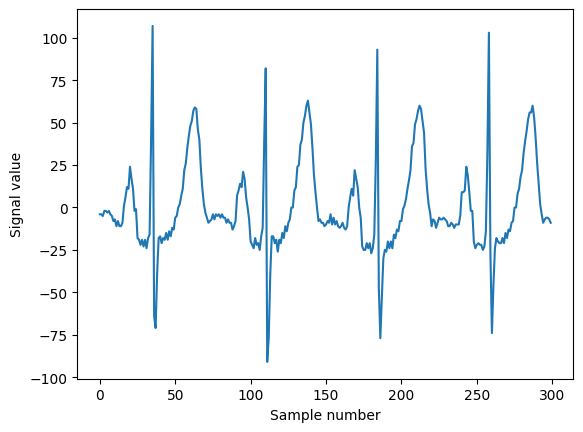

In [62]:
n_samples_to_plot = 300
plt.plot(ekg_data[0:n_samples_to_plot])
plt.xlabel("Sample number")
plt.ylabel("Signal value")
plt.show()

Since we have rather a lot of data, we'll take just the first 8,000 samples so our examples will run a bit faster:

In [63]:
ekg_data = ekg_data[0:8192]

### Windowing

The first step in our process is to split the waveform into overlapping segments, with the section of the original data sampled sliding along by two samples each time. We take this approach so that we get instances of each waveform shape with a variety of horizontal translations.

In [64]:
segment_len = 32
slide_len = 2

segments = []
for start_pos in range(0, len(ekg_data), slide_len):
    end_pos = start_pos + segment_len
    # make a copy so changes to 'segments' doesn't modify the original ekg_data
    segment = np.copy(ekg_data[start_pos:end_pos])
    # if we're at the end and we've got a truncated segment, drop it
    if len(segment) != segment_len:
        continue
    segments.append(segment)

print("Produced %d waveform segments" % len(segments))

Produced 4081 waveform segments


Let's take a look at the segments we've produced:

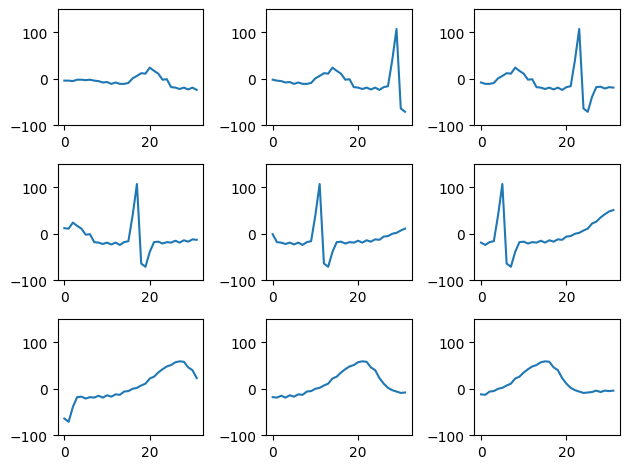

In [65]:
plot_waves(segments, step=3)

Note that these segments do not necessarily begin and end with a value of zero. This could be a problem later on: since the learned "normal" segment will then also have non-zero starts and end, when we try to reconstruct our waveform to be tested by adding together our learned segment, we'll end up with discontinuities.

The way we avoid this problem is to apply a *window function* to the data, which forces the start and end to be zero. A simple window function we can apply is the first half of a sine wave:

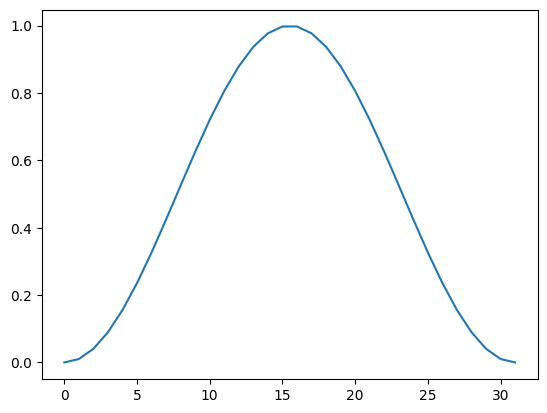

In [66]:
window_rads = np.linspace(0, np.pi, segment_len)
window = np.sin(window_rads)**2
plt.plot(window)
plt.show()

We then multiply each segment by this window function:

In [67]:
windowed_segments = []
for segment in segments:
    windowed_segment = np.copy(segment) * window
    windowed_segments.append(windowed_segment)

Plotting the result, we see the difference that the windowing process makes. The segments are now flat at the start and end - perfect to be joined together later.

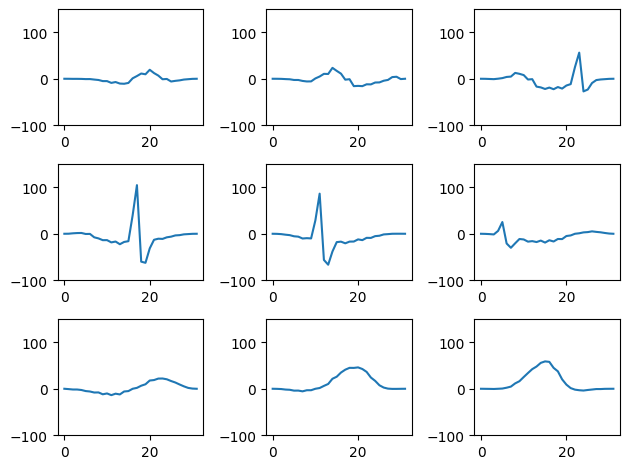

In [68]:
plot_waves(windowed_segments, step=3)

Note that windowing also has the effect of making the segments less affected by the waveform either side of the segment. The waveform shape represented by the segment is now more "concentrated" in the middle.

### Clustering

Next, we cluster our waveform segments in 32-dimensional space. The k-means algorithm is provided by Python's *scikit-learn* library.

In [69]:
clusterer = KMeans(n_clusters=150)
clusterer.fit(windowed_segments)

KMeans(n_clusters=150)

The cluster centroids are available through the `cluster_centers` attribute. Let's take a look to see what sort of shapes it's learned:

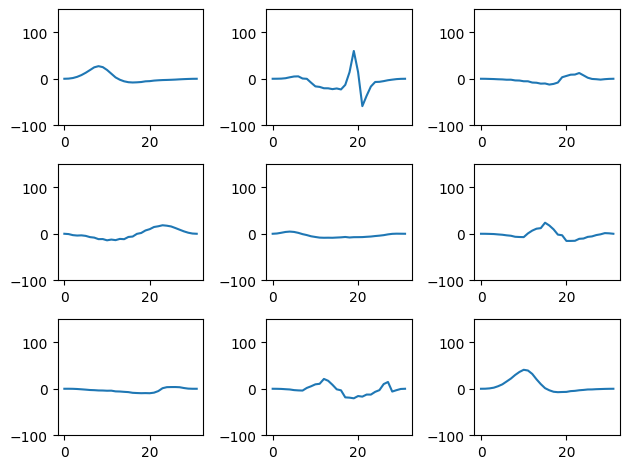

In [70]:
plot_waves(clusterer.cluster_centers_, step=15)

The clusterer appears to have learned a small number of basic shapes, with various horizontal translations. 

### Reconstruction from Clusters

Finally, we come to the interesting part of the algorithm: reconstructing our waveform to be tested using the learned library of shapes. Our approach is going to be very simple. We'll:

* Split the data into overlapping segments
* Find the cluster centroid which best matches our segment
* Use that centroid as the reconstruction for that segment
* Join the reconstruction segments up to form the reconstruction

This time, we only need enough overlap between segments to allow us to stitch the reconstructions back together again, so we'll go with an overlap of half a segment.

First, let's see how well we do at reconstructing the original waveform. We first form segments:

In [71]:
slide_len = segment_len/2
test_segments = sliding_chunker(
    ekg_data,
    window_len=segment_len,
    slide_len=int(slide_len)
)

Before trying to reconstruct the whole thing, we can check how the reconstruction fares for individual segments. Try changing the segment index to see the reconstruction for different segments.

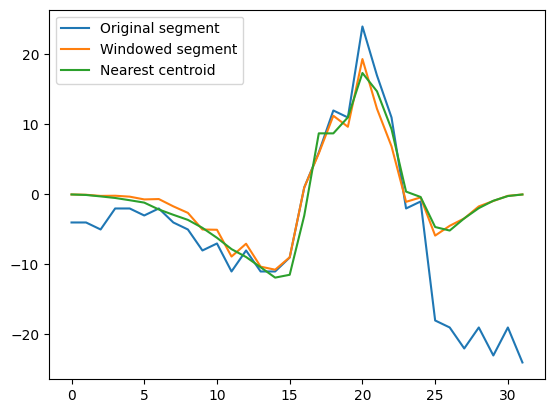

In [72]:
centroids = clusterer.cluster_centers_

segment = np.copy(test_segments[0])
# remember, the clustering was set up using the windowed data
# so to find a match, we should also window our search key
windowed_segment = segment * window
# predict() returns a list of centres to cope with the possibility of multiple
# samples being passed

nearest_centroid_idx = clusterer.predict(windowed_segment.reshape(1, -1))[0]
nearest_centroid = np.copy(centroids[nearest_centroid_idx])
plt.figure()
plt.plot(segment, label="Original segment")
plt.plot(windowed_segment, label="Windowed segment")
plt.plot(nearest_centroid, label="Nearest centroid")
plt.legend()
plt.show()

Looking good! So now, let's go ahead and try and reconstruct the full set of data.

Maximum reconstruction error was 8.8
98th percentile of reconstruction error was 6.1


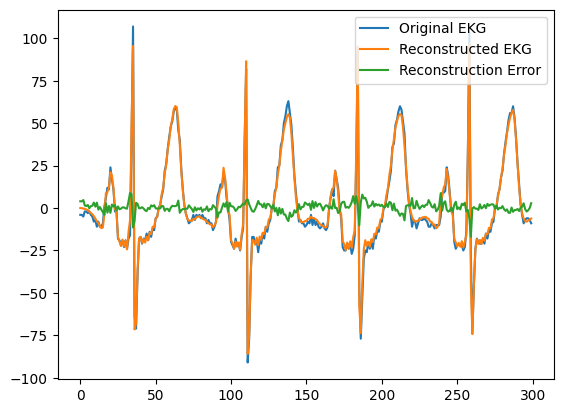

In [73]:
reconstruction = np.zeros(len(ekg_data))
slide_len = int(segment_len/2)

for segment_n, segment in enumerate(test_segments):
    # don't modify the data in segments
    segment = np.copy(segment)
    segment *= window
    nearest_centroid_idx = clusterer.predict(segment.reshape(1, -1))[0]
    centroids = clusterer.cluster_centers_
    nearest_centroid = np.copy(centroids[nearest_centroid_idx])
    
    # overlay our reconstructed segments with an overlap of half a segment
    pos = segment_n * slide_len
    reconstruction[pos:pos+segment_len] += nearest_centroid

n_plot_samples = 300

error = reconstruction[0:n_plot_samples] - ekg_data[0:n_plot_samples]
error_98th_percentile = np.percentile(error, 98)
print("Maximum reconstruction error was %.1f" % error.max())
print("98th percentile of reconstruction error was %.1f" % error_98th_percentile)

plt.plot(ekg_data[0:n_plot_samples], label="Original EKG")
plt.plot(reconstruction[0:n_plot_samples], label="Reconstructed EKG")
plt.plot(error[0:n_plot_samples], label="Reconstruction Error")
plt.legend()
plt.show()

The reconstruction is not bad at all!

### Anomaly Detection

Now that we're confident in our reconstruction algorithm, let's see what happens when we have an anomalous waveform. We'll introduce the anomaly manually by zeroing out a small number of samples of the original:

In [74]:
ekg_data_anomalous = np.copy(ekg_data)
ekg_data_anomalous[210:215] = 0

Then attempting a reconstruction of this data, using the same code as above:

Maximum reconstruction error was 55.4
98th percentile of reconstruction error was 8.8


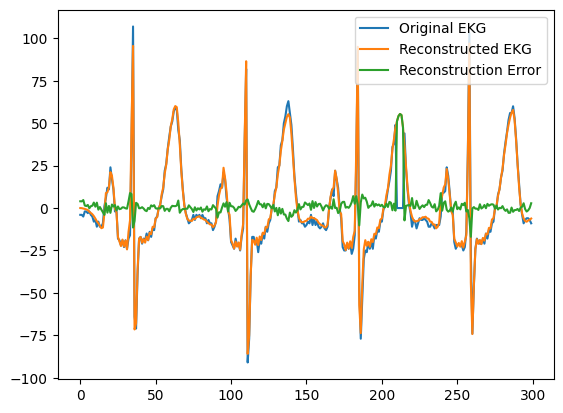

In [75]:
recontruction = \
    reconstruct(ekg_data_anomalous, window, clusterer)
    
error = reconstruction[0:n_plot_samples] - ekg_data_anomalous[0:n_plot_samples]
error_98th_percentile = np.percentile(error, 98)
print("Maximum reconstruction error was %.1f" % error.max())
print("98th percentile of reconstruction error was %.1f" % error_98th_percentile)

plt.plot(ekg_data_anomalous[0:n_plot_samples], label="Original EKG")
plt.plot(reconstruction[0:n_plot_samples], label="Reconstructed EKG")
plt.plot(error[0:n_plot_samples], label="Reconstruction Error")
plt.legend()
plt.show()

Since our anomaly has produced a shape in the waveform that hadn't been seen before, the waveform around that point couldn't be reconstructed using the learned shape library. This gives a large, easily visible reconstruction error! This error could be easily detected using a simple threshold detector.

### Conclusion

We've looked at one example of the use of unsupervised learning techniques in systems administration: anomaly detection of time series data based on reconstruction error from k-means clustering.

This problem could have been solved in different ways. For example, we could have trained a predictive neural network model, and examined the difference between the predicted waveform and the actual waveform. In general, there is no 'one size fits all' solution in machine learning - different techniques will be required for different problems.